Пусть:

X — матрица признаков (размер m x n).
w — вектор весов (размер n x 1).
y — вектор целевых значений (размер m x 1).
m — количество наблюдений.
n — количество признаков.
Функция логистической регрессии
Функция потерь (логарифмическая вероятность):

L(w) = - (1/m) * (y^T * log(σ(X * w)) + (1 - y)^T * log(1 - σ(X * w)))

где сигмоидная функция:

σ(z) = 1 / (1 + e^(-z))

Градиент функции потерь
Градиент функции потерь:

∇L(w) = - (1/m) * X^T * (y - σ(X * w))

Гессиан функции потерь
Гессиан функции потерь:

H(w) = - (1/m) * X^T * D(σ(X * w)) * X

где D(σ(X * w)) — диагональная матрица, элементы которой равны:

D(σ(X * w)) = diag(σ(X * w) ⊙ (1 - σ(X * w)))

Эксперимент №1. Траектория градиентного спуска на квадратичной функции

В данном эксперименте сравниваваются три различных стратегии выбора шага в методе градиентного спуска:

Константная стратегия, тратегия Армихо, стратегия Вульфа

Оптимизируются три квадратичные функции с разным числом обусловленности.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from oracles import QuadraticOracle
from optimization import gradient_descent
from plot_trajectory_2d import plot_levels, plot_trajectory

A1 = np.array([[1.0, 0.0], [0.0, 1.0]])  # Низкое число обусловленности
A2 = np.array([[1.0, 0.5], [0.5, 1.0]])  # Среднее число обусловленности
A3 = np.array([[1.0, 0.9], [0.9, 1.0]])  # Высокое число обусловленности
b = np.zeros(2)

oracle1 = QuadraticOracle(A1, b)
oracle2 = QuadraticOracle(A2, b)
oracle3 = QuadraticOracle(A3, b)

In [6]:
# Начальные точки
x0_1 = np.array([3.0, 3.0])
x0_2 = np.array([3.0, 3.0])
x0_3 = np.array([3.0, 3.0])

# Константная стратегия
x_star1_const, msg1_const, history1_const = gradient_descent(oracle1, x0_1, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
x_star2_const, msg2_const, history2_const = gradient_descent(oracle2, x0_2, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
x_star3_const, msg3_const, history3_const = gradient_descent(oracle3, x0_3, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)

# Стратегия Армихо
x_star1_armijo, msg1_armijo, history1_armijo = gradient_descent(oracle1, x0_1, line_search_options={'method': 'Armijo', 'c1': 1e-4}, trace=True)
x_star2_armijo, msg2_armijo, history2_armijo = gradient_descent(oracle2, x0_2, line_search_options={'method': 'Armijo', 'c1': 1e-4}, trace=True)
x_star3_armijo, msg3_armijo, history3_armijo = gradient_descent(oracle3, x0_3, line_search_options={'method': 'Armijo', 'c1': 1e-4}, trace=True)

# Стратегия Вульфа
x_star1_wolfe, msg1_wolfe, history1_wolfe = gradient_descent(oracle1, x0_1, line_search_options={'method': 'Wolfe', 'c1': 1e-4, 'c2': 0.9}, trace=True)
x_star2_wolfe, msg2_wolfe, history2_wolfe = gradient_descent(oracle2, x0_2, line_search_options={'method': 'Wolfe', 'c1': 1e-4, 'c2': 0.9}, trace=True)
x_star3_wolfe, msg3_wolfe, history3_wolfe = gradient_descent(oracle3, x0_3, line_search_options={'method': 'Wolfe', 'c1': 1e-4, 'c2': 0.9}, trace=True)

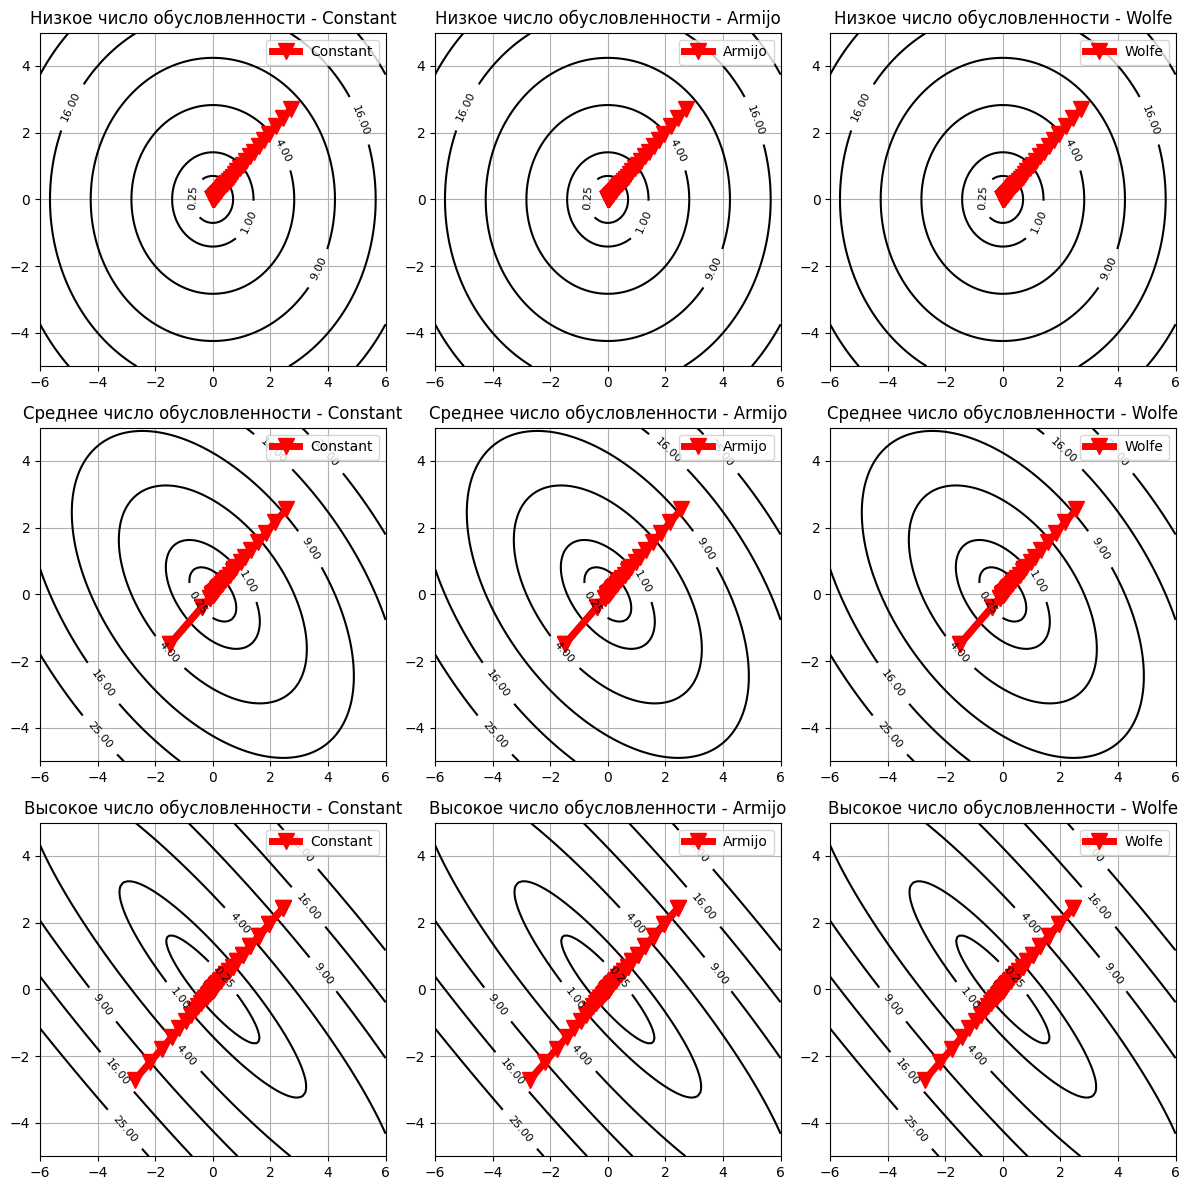

In [10]:
titles = ['Низкое число обусловленности', 'Среднее число обусловленности', 'Высокое число обусловленности']
strategies = ['Constant', 'Armijo', 'Wolfe']
plt.figure(figsize=(12, 12))  # Увеличиваем размер фигуры для всех графиков

for i in range(3):  # Для каждого уровня обусловленности
    for j in range(3):  # Для каждой стратегии
        plt.subplot(3, 3, i * 3 + j + 1)  # Установка подграфиков
        plot_levels(oracles[i].func)  # Рисуем уровень функции
        plot_trajectory(oracles[i].func, histories_const[i]['x'], label='Constant' if j == 0 else '')
        plot_trajectory(oracles[i].func, histories_armijo[i]['x'], label='Armijo' if j == 1 else '')
        plot_trajectory(oracles[i].func, histories_wolfe[i]['x'], label='Wolfe' if j == 2 else '')
        plt.title(f"{titles[i]} - {strategies[j]}")  # Заголовок для каждого графика
        plt.legend()

plt.tight_layout()  # Улучшение размещения графиков
plt.show()


Низкое число обусловленности:

Константная стратегия: Траектория достаточно прямая и быстро сходится к минимуму.

Стратегия Армихо: Траектория также прямая.

Стратегия Вульфа: Траектория практически идентична стратегии Армихо, но может быть немного более гладкой.

Среднее число обусловленности:

Константная стратегия: Траектория становится более извилистой и медленнее сходится к минимуму.

Стратегия Армихо: Траектория более прямая и быстрее сходится к минимуму по сравнению с константной стратегией.

Стратегия Вульфа: Траектория практически идентична стратегии Армихо, но может быть немного более гладкой.

Высокое число обусловленности:

Константная стратегия: Траектория становится очень извилистой и сходится очень медленно.

Стратегия Армихо: Траектория более прямая и быстрее сходится к минимуму по сравнению с константной стратегией.

Стратегия Вульфа: Траектория практически идентична стратегии Армихо, но может быть немного более гладкой.

Эксперимент №2. Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

В данном эксперименте исследуется зависимость числа итераций, необходимых для сходимости метода градиентного спуска, от числа обусловленности квадратичной функции и размерности пространства.

Генерирую квадратичные функции с различными числами обусловленности κ и размерностями n. Для каждой комбинации (n, κ) запускается метод градиентного спуска с использованием стратегии Армихо (c1 = 1e-4) и записывается количество итераций, необходимых для достижения заданной точности (tolerance = 1e-5).

In [16]:
from scipy.sparse import diags

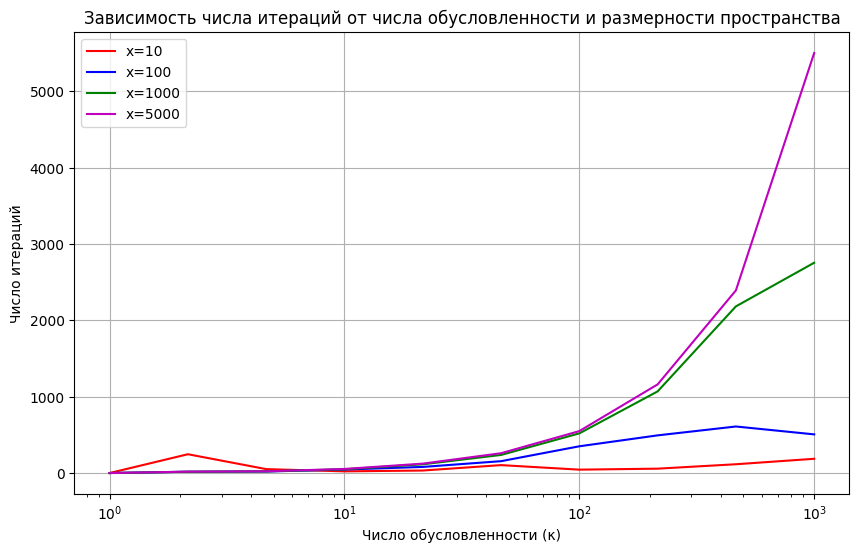

In [24]:
def generate_quadratic_problem(x, k):
    a = np.random.uniform(1, k, x)
    A = diags(a)
    b = np.random.randn(x)
    return QuadraticOracle(A, b)

def run_experiment(x, k_values, num_runs=5):
    iterations = []
    for k in k_values:
        iter_k = []
        for _ in range(num_runs):
            oracle = generate_quadratic_problem(x, k)
            x0 = np.random.randn(x)
            _, _, history = gradient_descent(oracle, x0, tolerance=1e-5, max_iter=10000, line_search_options={'method': 'Armijo', 'c1': 1e-4}, trace=True)
            iter_k.append(len(history['func']))
        iterations.append(iter_k)
    return iterations

x_values = [10, 100, 1000, 5000]
k_values = np.logspace(0, 3, 10)
num_runs = 5

results = {}
for x in x_values:
    results[x] = run_experiment(x, k_values, num_runs)

plt.figure(figsize=(10, 6))
colors = ['r', 'b', 'g', 'm', 'c']
for i, x in enumerate(x_values):
    mean_iterations = np.mean(results[x], axis=1)
    std_iterations = np.std(results[x], axis=1)
    plt.plot(k_values, mean_iterations, color=colors[i], label=f'x={x}')

plt.xscale('log')
plt.xlabel('Число обусловленности (κ)')
plt.ylabel('Число итераций')
plt.title('Зависимость числа итераций от числа обусловленности и размерности пространства')
plt.legend()
plt.grid(True)
plt.show()

Из полученных графиков можно сделать следующие выводы:
С увеличением числа обусловленности κ, число итераций, необходимых для сходимости градиентного спуска, увеличивается. Плохо обусловленные матрицы (с большим κ) приводят к более медленной сходимости метода.

Зависимость от размерности пространства:
С увеличением размерности n число итераций также увеличивается, но это увеличение может быть нелинейным. Это связано с тем, что большая размерность пространства требует большего числа итераций для достижения той же точности.

Влияние случайности:
Поскольку каждая задача генерируется случайным образом, наблюдается разброс в числе итераций для одного и того же значения κ. Этот разброс отражается на графике в виде области вокруг среднего значения.

Эксперимент №3. Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

В данном эксперименте сравнивается эффективность метода градиентного спуска и метода Ньютона на задаче логистической регрессии с L2-регуляризацией. Используем данные наборы данных для обучения модели.
Для каждого метода запускается оптимизация с использованием стратегии Армихо (c1 = 1e-4) и записывается историю сходимости: время выполнения, значение функции потерь и норму градиента.

In [27]:
from sklearn.datasets import load_svmlight_file
from datetime import datetime
from optimization import gradient_descent, newton
from oracles import create_log_reg_oracle
import numpy as np
import matplotlib.pyplot as plt

# Функция для запуска эксперимента
def run_experiment(data, method, regcoef, max_iter=100, tolerance=1e-5):
    # Загрузка данных
    X, y = data
    X = X.toarray()
    y = 2 * y - 1  # Преобразуем метки {0, 1} в {-1, 1}
    
    # Создаем оракул логистической регрессии
    oracle = create_log_reg_oracle(X, y, regcoef)
    
    # Начальная точка
    x0 = np.zeros(X.shape[1])
    
    # Запуск метода
    start_time = datetime.now()
    x_star, msg, history = method(oracle, x0, max_iter=max_iter, tolerance=tolerance, trace=True)
    
    # Добавляем временные метки к истории
    history['time'] = [t  for t in history['time']] 
    return history

In [28]:
def plot_experiment(histories, labels, title):
    plt.figure(figsize=(14, 6))

    # График значений функции
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history['time'], history['func'], label=label)

    plt.xlabel('Время (с)')
    plt.ylabel('Функция потерь')
    plt.title(f'Значение функции для датасета {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    # График норм градиента
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        grad_norm_ratio = np.array(history['grad_norm']) / history['grad_norm'][0]
        plt.plot(history['time'], grad_norm_ratio, label=label)
    plt.xlabel('Время (с)')
    plt.ylabel('Относительная норма градиента')
    plt.title(f'Норма градиента для датасета {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [29]:
# Параметры эксперимента
dataset_paths = [r"C:\Users\user\PycharmProjects\hm08\hm02\w8a.t.txt", 
                 r"C:\Users\user\PycharmProjects\hm08\hm02\gisette_scale.t", 
                 r"C:\Users\user\PycharmProjects\hm08\hm02\\real-sim"]

regcoef = lambda m: 1 / m

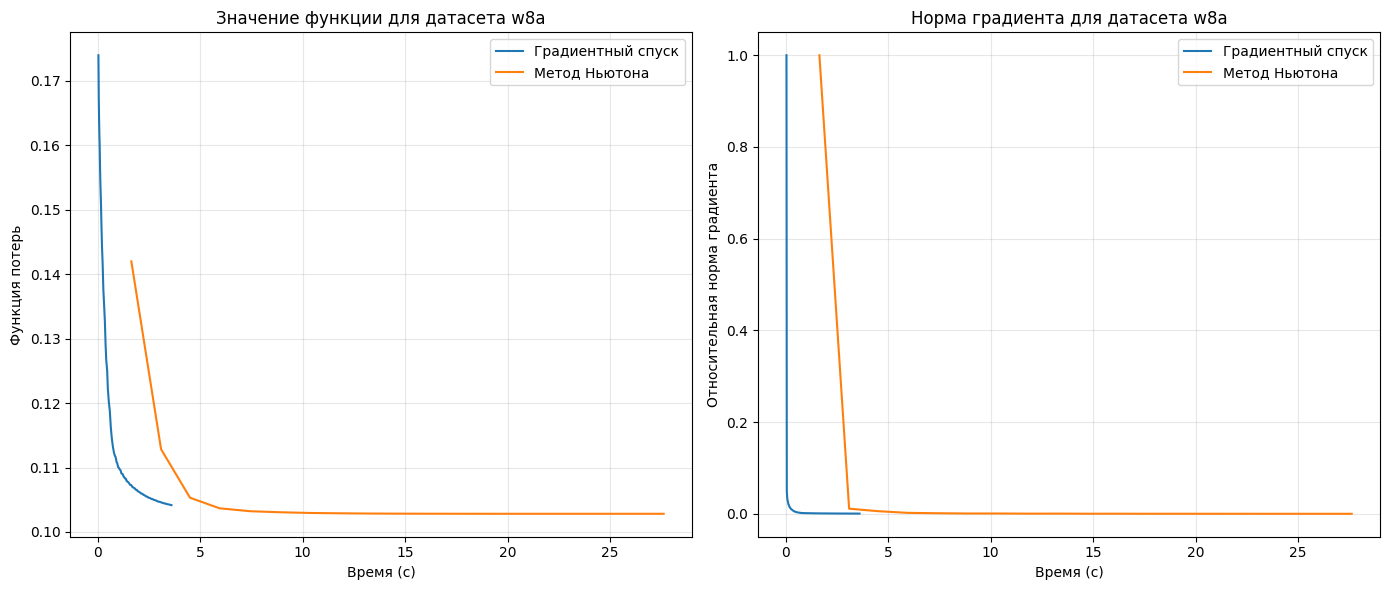

In [30]:
X_, y_ = load_svmlight_file(dataset_paths[0])
regcoef_value = regcoef(X_.shape[0])

# Запуск методов на наборе данных 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# Построение графиков
plot_experiment([history_gd, history_newton], ['Градиентный спуск', 'Метод Ньютона'], 'w8a')

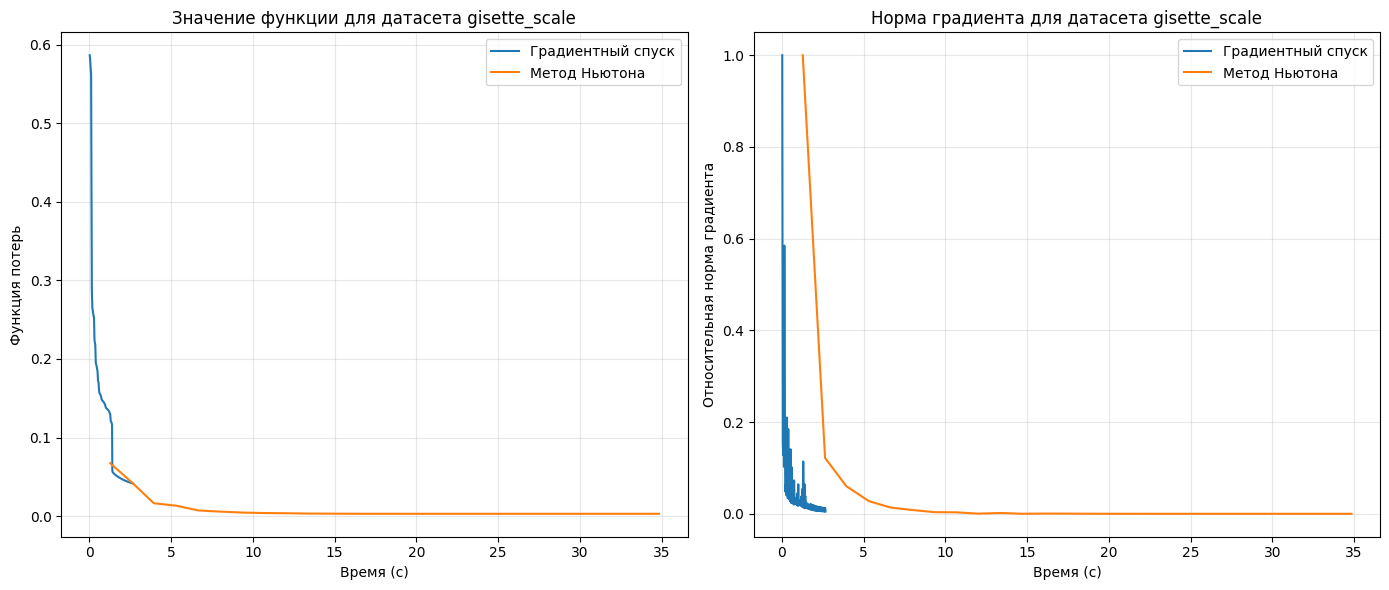

In [10]:
X_, y_ = load_svmlight_file(dataset_paths[1])
regcoef_value = regcoef(X_.shape[0])

# Запуск методов на наборе данных 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# Построение графиков
plot_experiment([history_gd, history_newton], ['Градиентный спуск', 'Метод Ньютона'], 'gisette_scale')

Сходимость по значению функции потерь:

Метод градиентного спуска: Значение функции потерь уменьшается постепенно, но требует большего времени для достижения заданной точности.

Метод Ньютона: Значение функции потерь уменьшается значительно быстрее, чем в методе градиентного спуска. Метод Ньютона достигает заданной точности за меньшее время.

Сходимость по относительному квадрату нормы градиента:

Метод градиентного спуска: Относительный квадрат нормы градиента уменьшается медленно, что указывает на медленную сходимость метода.

Метод Ньютона: Относительный квадрат нормы градиента уменьшается значительно быстрее, что указывает на быструю сходимость метода.